In [72]:
# pandas 이용
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # 파일 오류 무시


# 1~13페이지까지 추출
df = pd.DataFrame()
for page_num in range(1,14,1):
    url = f'https://land.naver.com/news/trendReport.naver?page={page_num}'
    temp_num = pd.read_html(url, encoding='utf-8')
    df = pd.concat([df,temp_num[0]])

In [73]:
df

,번호,제목,등록일,조회수
0,1806,"[6월3주 전국]전국-0.01%, 서울 0.05%, 수도권 0.01%",2024.06.24,479
1,1805,"[6월2주 전국]전국 0.09%, 서울 0.20%, 수도권 0.13%",2024.06.17,971
2,1804,"[6월1주 전국]전국-0.04%, 서울 0.02%, 수도권-0.02%",2024.06.07,1199
3,1803,"[5월5주 전국]전국 0.04%, 서울 0.12%, 수도권 0.08%",2024.05.31,993
4,1802,"[5월4주 전국]전국 0.04%, 서울 0.00%, 수도권-0.06%",2024.05.27,846
...,...,...,...,...
15,1546,"[7월5주 전국] 전국 0.12%, 서울 0.32%, 수도권 0.04%",2019.08.01,4279
16,1545,"[7월4주 전국] 전국 0.16%, 서울 0.39%, 수도권 0.18%",2019.07.26,4064
17,1544,"[7월3주 전국] 전국 0.32%, 서울 0.65%, 수도권 0.44%",2019.07.19,4367
18,1543,"[7월2주 전국] 전국 0.19%, 서울 0.36%, 수도권 0.14%",2019.07.11,4016


In [74]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      260 non-null    int64 
 1   제목      260 non-null    object
 2   등록일     260 non-null    object
 3   조회수     260 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.2+ KB


In [75]:
# df_cp = df.copy()
# df_cp['제목'] = df_cp['제목'].str.split(' ')
# # df_cp['제목'] = df_cp['제목'].str.split(']')
# _ = []
# for i in df.제목:
#     i = i.split(']')
#     _ += i
    
# _[:5]

In [76]:
# even_ = []
# for i in range(1, len(_), 2):
#     even_.append(_[i])

# even_[:5]

In [77]:
# % 제거
df_cp = df.copy()
df_cp = df_cp['제목'].str.replace('%', "")
df_cp

0      [6월3주 전국]전국-0.01, 서울 0.05, 수도권 0.01
1      [6월2주 전국]전국 0.09, 서울 0.20, 수도권 0.13
2      [6월1주 전국]전국-0.04, 서울 0.02, 수도권-0.02
3      [5월5주 전국]전국 0.04, 서울 0.12, 수도권 0.08
4      [5월4주 전국]전국 0.04, 서울 0.00, 수도권-0.06
                      ...                 
15    [7월5주 전국] 전국 0.12, 서울 0.32, 수도권 0.04
16    [7월4주 전국] 전국 0.16, 서울 0.39, 수도권 0.18
17    [7월3주 전국] 전국 0.32, 서울 0.65, 수도권 0.44
18    [7월2주 전국] 전국 0.19, 서울 0.36, 수도권 0.14
19    [7월1주 전국] 전국 0.06, 서울 0.18, 수도권 0.02
Name: 제목, Length: 260, dtype: object

In [78]:
# 전국, 서울, 수도권 제거
regions = ['전국', '서울', '수도권']
for region in regions:
    df_cp = df_cp.str.replace(region, '')

df_cp

0      [6월3주 ]-0.01,  0.05,  0.01
1      [6월2주 ] 0.09,  0.20,  0.13
2      [6월1주 ]-0.04,  0.02, -0.02
3      [5월5주 ] 0.04,  0.12,  0.08
4      [5월4주 ] 0.04,  0.00, -0.06
                 ...             
15    [7월5주 ]  0.12,  0.32,  0.04
16    [7월4주 ]  0.16,  0.39,  0.18
17    [7월3주 ]  0.32,  0.65,  0.44
18    [7월2주 ]  0.19,  0.36,  0.14
19    [7월1주 ]  0.06,  0.18,  0.02
Name: 제목, Length: 260, dtype: object

In [79]:
# ]를 중심으로 컬럼 구분 후 필요한 컬럼 선택
df_cp = df_cp.str.split(']', expand=True)
df_cp = df_cp[1]

In [80]:
# ,를 기준으로 분리
df_cp = df_cp.str.split(',', expand=True)

In [81]:
# 선택된 정보 저장
df_selected = df_cp.copy()
df_selected

,0,1,2
0,-0.01,0.05,0.01
1,0.09,0.20,0.13
2,-0.04,0.02,-0.02
3,0.04,0.12,0.08
4,0.04,0.00,-0.06
...,...,...,...
15,0.12,0.32,0.04
16,0.16,0.39,0.18
17,0.32,0.65,0.44
18,0.19,0.36,0.14


In [82]:
# 데이터 조회
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       260 non-null    object
 1   1       260 non-null    object
 2   2       260 non-null    object
dtypes: object(3)
memory usage: 8.1+ KB


In [83]:
# str → float 자료형 변환
df_selected = df_selected.astype('float')

In [84]:
# 컬럼명 바꾸기
df_selected = df_selected.rename(columns={0:'전국', 1:'서울', 2:'수도권'})
df_selected

,전국,서울,수도권
0,-0.01,0.05,0.01
1,0.09,0.20,0.13
2,-0.04,0.02,-0.02
3,0.04,0.12,0.08
4,0.04,0.00,-0.06
...,...,...,...
15,0.12,0.32,0.04
16,0.16,0.39,0.18
17,0.32,0.65,0.44
18,0.19,0.36,0.14


In [85]:
# 데이터 병합
df_tune1 = pd.concat([df, df_selected], axis=1)
df_tune1

# df[regions] = df_selected # 다른 방법

,번호,제목,등록일,조회수,전국,서울,수도권
0,1806,"[6월3주 전국]전국-0.01%, 서울 0.05%, 수도권 0.01%",2024.06.24,479,-0.01,0.05,0.01
1,1805,"[6월2주 전국]전국 0.09%, 서울 0.20%, 수도권 0.13%",2024.06.17,971,0.09,0.20,0.13
2,1804,"[6월1주 전국]전국-0.04%, 서울 0.02%, 수도권-0.02%",2024.06.07,1199,-0.04,0.02,-0.02
3,1803,"[5월5주 전국]전국 0.04%, 서울 0.12%, 수도권 0.08%",2024.05.31,993,0.04,0.12,0.08
4,1802,"[5월4주 전국]전국 0.04%, 서울 0.00%, 수도권-0.06%",2024.05.27,846,0.04,0.00,-0.06
...,...,...,...,...,...,...,...
15,1546,"[7월5주 전국] 전국 0.12%, 서울 0.32%, 수도권 0.04%",2019.08.01,4279,0.12,0.32,0.04
16,1545,"[7월4주 전국] 전국 0.16%, 서울 0.39%, 수도권 0.18%",2019.07.26,4064,0.16,0.39,0.18
17,1544,"[7월3주 전국] 전국 0.32%, 서울 0.65%, 수도권 0.44%",2019.07.19,4367,0.32,0.65,0.44
18,1543,"[7월2주 전국] 전국 0.19%, 서울 0.36%, 수도권 0.14%",2019.07.11,4016,0.19,0.36,0.14


In [93]:
# 원하는 컬럼 선택
final_df = df_tune1[['등록일', '전국', '서울', '수도권', '번호']]
final_df

,등록일,전국,서울,수도권,번호
0,2024.06.24,-0.01,0.05,0.01,1806
1,2024.06.17,0.09,0.20,0.13,1805
2,2024.06.07,-0.04,0.02,-0.02,1804
3,2024.05.31,0.04,0.12,0.08,1803
4,2024.05.27,0.04,0.00,-0.06,1802
...,...,...,...,...,...
15,2019.08.01,0.12,0.32,0.04,1546
16,2019.07.26,0.16,0.39,0.18,1545
17,2019.07.19,0.32,0.65,0.44,1544
18,2019.07.11,0.19,0.36,0.14,1543


In [95]:
# 데이터 정렬
final_df = final_df[::-1].reset_index(drop=True)
final_df

,등록일,전국,서울,수도권,번호
0,2019.07.08,0.06,0.18,0.02,1542
1,2019.07.11,0.19,0.36,0.14,1543
2,2019.07.19,0.32,0.65,0.44,1544
3,2019.07.26,0.16,0.39,0.18,1545
4,2019.08.01,0.12,0.32,0.04,1546
...,...,...,...,...,...
255,2024.05.27,0.04,0.00,-0.06,1802
256,2024.05.31,0.04,0.12,0.08,1803
257,2024.06.07,-0.04,0.02,-0.02,1804
258,2024.06.17,0.09,0.20,0.13,1805


In [96]:
# datetime 변환
final_df['등록일'] = pd.to_datetime(final_df['등록일'])
final_df

,등록일,전국,서울,수도권,번호
0,2019-07-08,0.06,0.18,0.02,1542
1,2019-07-11,0.19,0.36,0.14,1543
2,2019-07-19,0.32,0.65,0.44,1544
3,2019-07-26,0.16,0.39,0.18,1545
4,2019-08-01,0.12,0.32,0.04,1546
...,...,...,...,...,...
255,2024-05-27,0.04,0.00,-0.06,1802
256,2024-05-31,0.04,0.12,0.08,1803
257,2024-06-07,-0.04,0.02,-0.02,1804
258,2024-06-17,0.09,0.20,0.13,1805


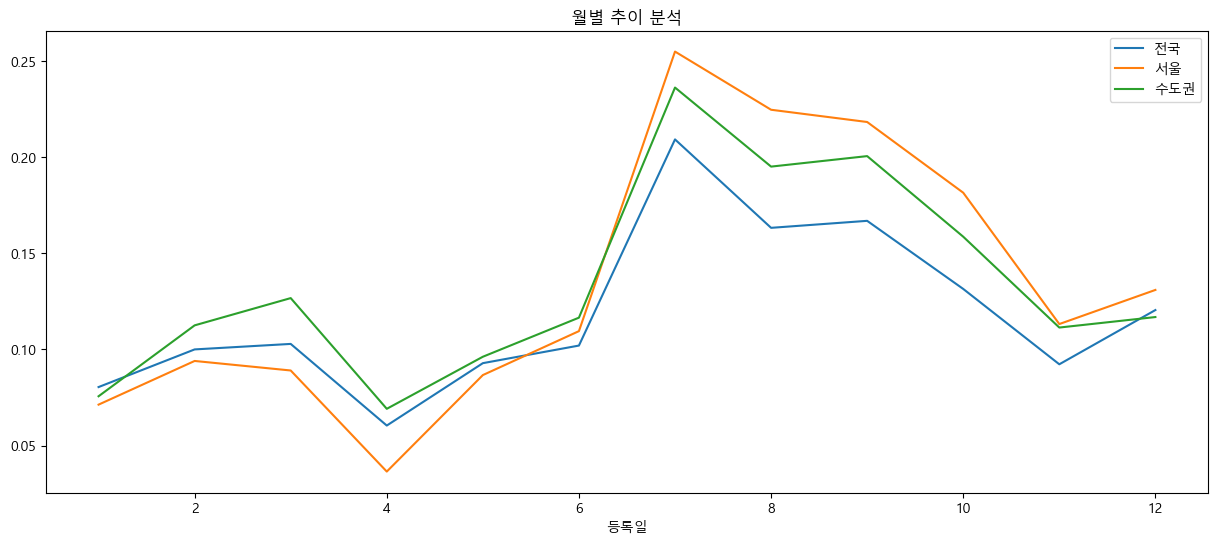

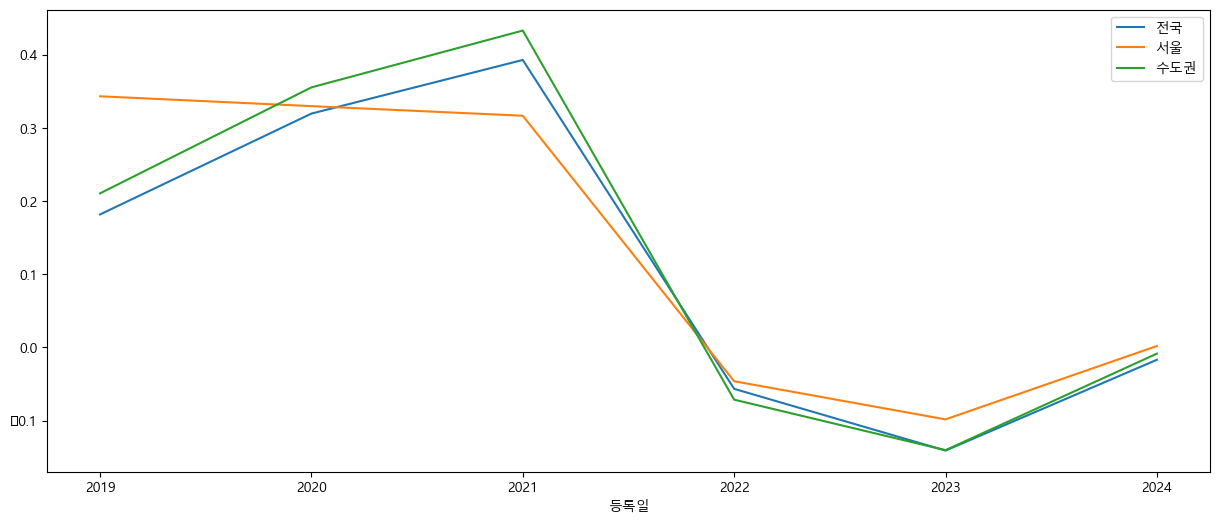

In [112]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') # 차트에 한글 글자 깨짐 방지

# 월별 추이 분석(평균)
montly_analysis = final_df.groupby(final_df.등록일.dt.month)[['전국', '서울', '수도권']].mean()
montly_analysis.plot(figsize = (15,6), title = '월별 추이 분석')
plt.show()

# 년도별 추이 분석(평균)
yearly_analysis = final_df.groupby(final_df.등록일.dt.year)[['전국', '서울', '수도권']].mean()
yearly_analysis.plot(figsize = (15,6))
plt.show()